In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display
import sys
import os
import logging
sys.path.insert(0,'../src')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.cm as cm
from scipy.stats import spearmanr

from plot_utils import plot_ground_truth_heatmap, plot_spike_grps

logger = logging.getLogger("feat_viz")
logging.basicConfig(format='[%(name)s %(levelname)s] %(message)s', level=logging.INFO)

from sim_utils import load_regime_results, launch_regime_feat_sel, create_trial_jobs
from sim_utils import generate_regime_info, get_regime_info, get_sim_params
from sim_utils import generate_x_mtx
from plot_utils import plot_ground_truth_heatmap
from plot_utils import check_spike_groups, check_example_noise_matrix
def visualize_setup(sim_id, plot_mtx=False):
    check_spike_groups(sim_id)
    if plot_mtx:
        check_example_noise_matrix(sim_id)
    df_regime = generate_regime_info(sim_id)
    # core simulation parameters
    logger.setLevel(logging.DEBUG)
    df_regime = get_regime_info(sim_id)
    display(df_regime.tail())
    display("Number of jobs to submit: {}".format(df_regime.shape[0]))

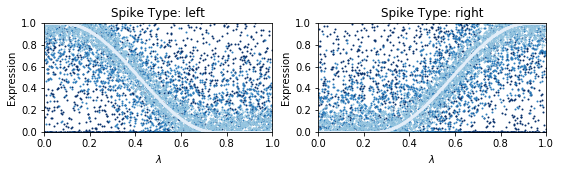

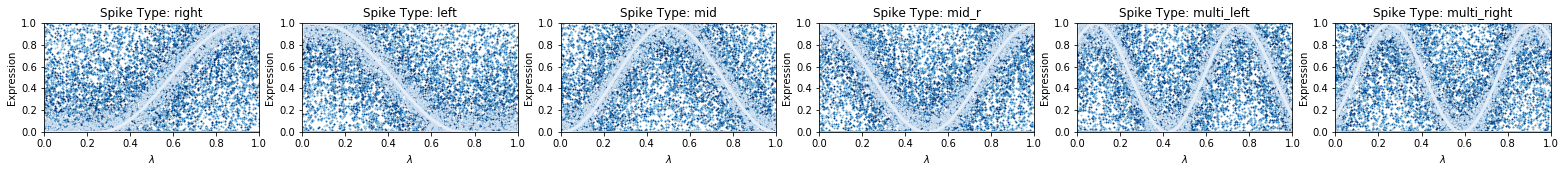

[feat_viz INFO] {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 150, 'rel_noise_list': [0.5], 'seed_offset': 100}
[feat_viz INFO] Null structure: {'model': 'normal', 'block_size': 150, 'corr_value': 0}


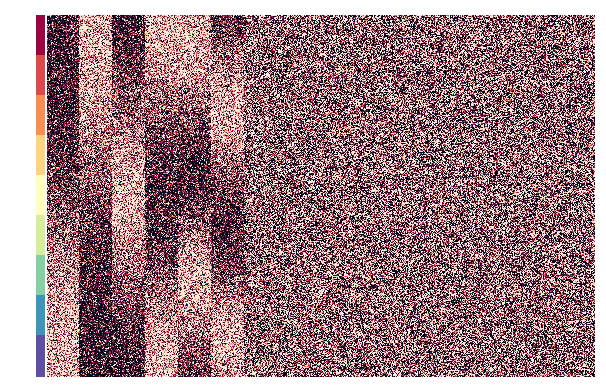

[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 100, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['unsup_pc', 'unsup_graph', 'pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_5', 'save': True, 'check_skip': False, 'null_struct': {'model': 'normal', 'block_size': 150, 'corr_value': 0}}
[feat_viz DEBUG] Data (length 17) saved as: /share/PI/sabatti/feat_viz/main_sim_5/param_all.json
[feat_viz DEBUG] Data (shape (18, 3)) saved as: /share/PI/sabatti/feat_viz/main_sim_5/regime_info.csv
[feat_viz INFO] Saved regimes to: /share/PI/sabatti/feat_viz/main_sim_5/regime_info.csv
[feat_viz DEBUG] Data (shape (18, 3)) loade

n_samps  sparsity  noise_lev  Regime
13     1500       0.2        0.5      13
14     1500       0.2        1.0      14
15     1500       0.2        1.5      15
16     1500       0.2        2.0      16
17     1500       0.2        3.0      17

'Number of jobs to submit: 18'

In [25]:
sim_id = "main_sim_5"
visualize_setup(sim_id, plot_mtx=True)

In [4]:
launch_regime_feat_sel(sim_id, 0, test=True) # noiseless regime

NameError: name 'sim_id' is not defined

In [27]:
launch_regime_feat_sel(sim_id, 15, test=True) # noisy regime

[feat_viz DEBUG] Data (length 17) loaded from: /share/PI/sabatti/feat_viz/main_sim_5/param_all.json
[feat_viz INFO] Results dir: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_15 (Regime: 15)
[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_5/regime_info.csv
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.2, 'noise_lev': 1.5, 'i_regime': 15, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_15'}
[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 2, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['unsup_pc', 'unsup_graph', 'pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/shar

Trial       Method      Corr       FDP     Power
0     0     unsup_pc  0.045474  0.800000  1.000000
1     0  unsup_graph  0.984035  0.800000  1.000000
2     0           pc  0.972677  0.029032  0.334444
3     0        graph  0.984189  0.027363  0.434444
4     1     unsup_pc  0.153986  0.800000  1.000000
5     1  unsup_graph  0.983734  0.800000  1.000000
6     1           pc  0.973009  0.058915  0.337222
7     1        graph  0.982031  0.029062  0.408333

In [28]:
create_trial_jobs(sim_id)

[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_5/regime_info.csv
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_0/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_1/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_2/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_3/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_4/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_5/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_6/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_7/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_5/regime_results/regime_8/slurm_jo

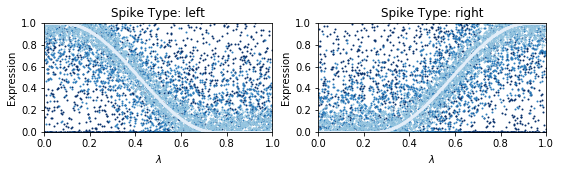

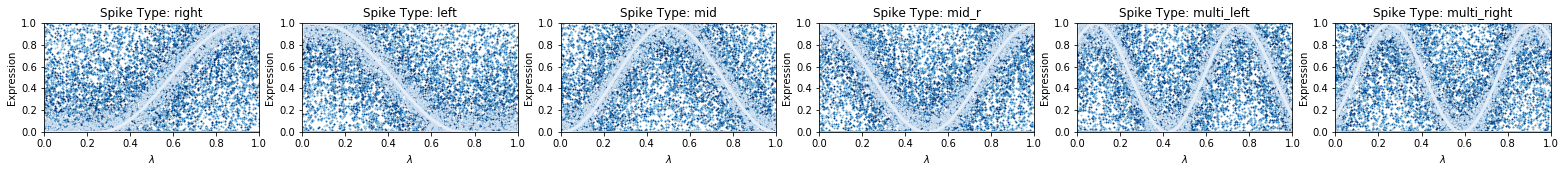

[feat_viz INFO] {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 150, 'rel_noise_list': [0.5], 'seed_offset': 100}
[feat_viz INFO] Null structure: {'model': 'normal', 'block_size': 150, 'corr_value': 0.5}


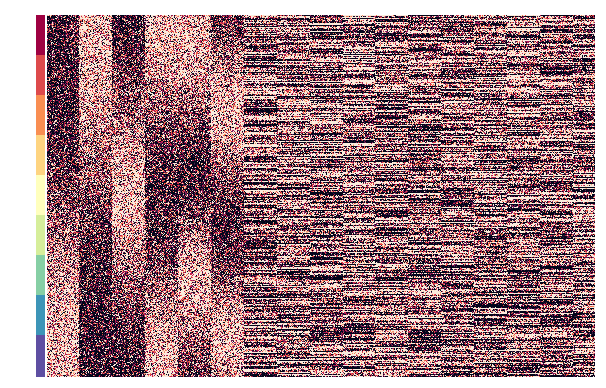

[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 100, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['unsup_pc', 'unsup_graph', 'pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_4', 'save': True, 'check_skip': False, 'null_struct': {'model': 'normal', 'block_size': 150, 'corr_value': 0.5}}
[feat_viz DEBUG] Data (length 17) saved as: /share/PI/sabatti/feat_viz/main_sim_4/param_all.json
[feat_viz DEBUG] Data (shape (18, 3)) saved as: /share/PI/sabatti/feat_viz/main_sim_4/regime_info.csv
[feat_viz INFO] Saved regimes to: /share/PI/sabatti/feat_viz/main_sim_4/regime_info.csv
[feat_viz DEBUG] Data (shape (18, 3)) loa

n_samps  sparsity  noise_lev  Regime
13     1500       0.2        0.5      13
14     1500       0.2        1.0      14
15     1500       0.2        1.5      15
16     1500       0.2        2.0      16
17     1500       0.2        3.0      17

'Number of jobs to submit: 18'

In [17]:
sim_id = "main_sim_4"
visualize_setup(sim_id, plot_mtx=True)

In [20]:
launch_regime_feat_sel(sim_id, 0, test=True) # noiseless regime

[feat_viz DEBUG] Data (length 17) loaded from: /share/PI/sabatti/feat_viz/main_sim_4/param_all.json
[feat_viz INFO] Results dir: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_0 (Regime: 0)
[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_4/regime_info.csv
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.05, 'noise_lev': 0.1, 'i_regime': 0, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_0'}
[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 2, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['unsup_pc', 'unsup_graph', 'pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/P

Trial       Method      Corr       FDP     Power
0     0     unsup_pc  0.055949  0.950000  1.000000
1     0  unsup_graph  0.010074  0.950000  1.000000
2     0           pc  0.986337  0.019608  0.333333
3     0        graph  0.999273  0.050633  1.000000
4     1     unsup_pc  0.036471  0.950000  1.000000
5     1  unsup_graph  0.564055  0.950000  1.000000
6     1           pc  0.986611  0.090909  0.333333
7     1        graph  0.999261  0.058577  1.000000

In [21]:
launch_regime_feat_sel(sim_id, 15, test=True) # noisy regime

[feat_viz DEBUG] Data (length 17) loaded from: /share/PI/sabatti/feat_viz/main_sim_4/param_all.json
[feat_viz INFO] Results dir: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_15 (Regime: 15)
[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_4/regime_info.csv
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.2, 'noise_lev': 1.5, 'i_regime': 15, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_15'}
[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 2, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['unsup_pc', 'unsup_graph', 'pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/shar

Trial       Method      Corr       FDP     Power
0     0     unsup_pc  0.012788  0.800000  1.000000
1     0  unsup_graph  0.131383  0.800000  1.000000
2     0           pc  0.972493  0.016287  0.335556
3     0        graph  0.984016  0.035936  0.432222
4     1     unsup_pc  0.147857  0.800000  1.000000
5     1  unsup_graph  0.122620  0.800000  1.000000
6     1           pc  0.973065  0.030449  0.336111
7     1        graph  0.980793  0.024194  0.403333

In [22]:
create_trial_jobs(sim_id)

[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_4/regime_info.csv
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_0/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_1/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_2/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_3/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_4/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_5/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_6/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_7/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_4/regime_results/regime_8/slurm_jo

# Simulation with non-monotone predominant variables

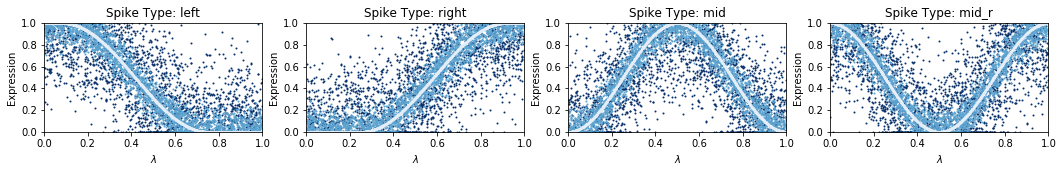

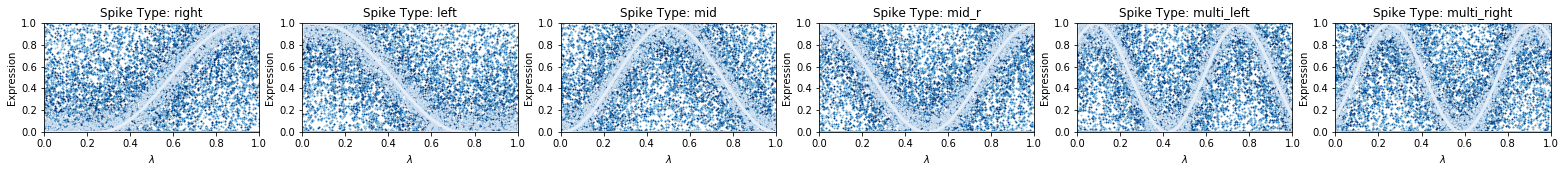

[feat_viz INFO] {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 150, 'rel_noise_list': [0.5], 'seed_offset': 100}


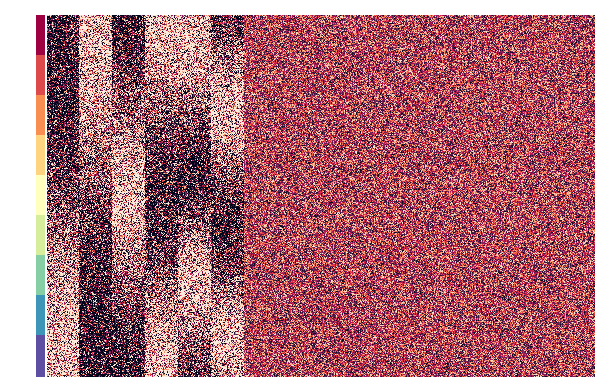

[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right', 'mid', 'mid_r'], 'n_repetitions': 1, 'rel_noise_list': [0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 100, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_3', 'save': True, 'check_skip': False, 'null_struct': {}}
[feat_viz DEBUG] Data (length 17) saved as: /share/PI/sabatti/feat_viz/main_sim_3/param_all.json
[feat_viz DEBUG] Data (shape (18, 3)) saved as: /share/PI/sabatti/feat_viz/main_sim_3/regime_info.csv
[feat_viz INFO] Saved regimes to: /share/PI/sabatti/feat_viz/main_sim_3/regime_info.csv
[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_3/regime_info.csv


n_samps  sparsity  noise_lev  Regime
13     1500       0.2        0.5      13
14     1500       0.2        1.0      14
15     1500       0.2        1.5      15
16     1500       0.2        2.0      16
17     1500       0.2        3.0      17

'Number of jobs to submit: 18'

In [7]:
sim_id = "main_sim_3"
visualize_setup(sim_id, plot_mtx=True)

In [18]:
launch_regime_feat_sel(sim_id, 0, test=True)

[feat_viz DEBUG] Data (length 16) loaded from: /share/PI/sabatti/feat_viz/main_sim_3/param_all.json
[feat_viz INFO] Results dir: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_0 (Regime: 0)
[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_3/regime_info.csv
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.05, 'noise_lev': 0.1, 'i_regime': 0, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_0'}
[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right', 'mid', 'mid_r'], 'n_repetitions': 1, 'rel_noise_list': [0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 2, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/feat

Trial Method      Corr       FDP     Power
0     0     pc  0.251248  0.045802  0.833333
1     0  graph  0.999229  0.054622  1.000000
2     1     pc  0.248156  0.062500  0.833333
3     1  graph  0.999249  0.079755  1.000000

In [19]:
launch_regime_feat_sel(sim_id, 15, test=True)

[feat_viz DEBUG] Data (length 16) loaded from: /share/PI/sabatti/feat_viz/main_sim_3/param_all.json
[feat_viz INFO] Results dir: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_15 (Regime: 15)
[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_3/regime_info.csv
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.2, 'noise_lev': 1.5, 'i_regime': 15, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_15'}
[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right', 'mid', 'mid_r'], 'n_repetitions': 1, 'rel_noise_list': [0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 2, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/f

Trial Method      Corr       FDP     Power
0     0     pc  0.249199  0.038714  0.813889
1     0  graph  0.991152  0.041004  0.870556
2     1     pc  0.247482  0.030893  0.801667
3     1  graph  0.990867  0.041401  0.836111

In [20]:
create_trial_jobs(sim_id)

[feat_viz DEBUG] Data (shape (18, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_3/regime_info.csv
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_0/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_1/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_2/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_3/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_4/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_5/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_6/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_7/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_3/regime_results/regime_8/slurm_jo

### Simulation setup and check-ups


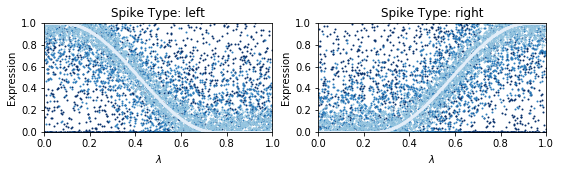

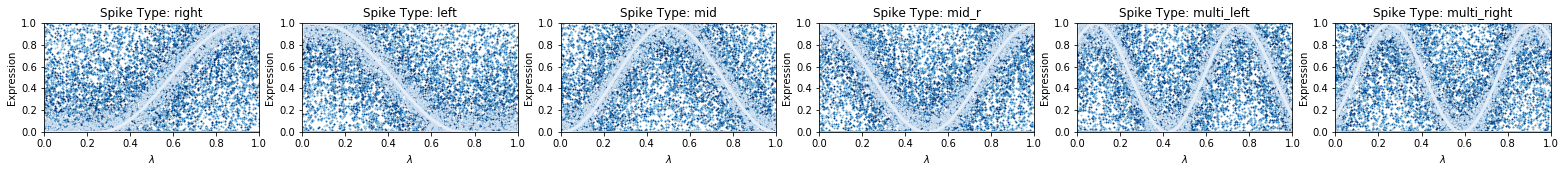

[feat_viz INFO] {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': 150, 'rel_noise_list': [0.5], 'seed_offset': 100}


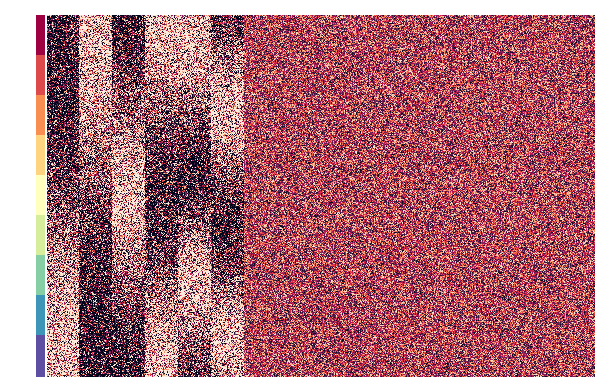

[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 100, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.01, 0.05, 0.1, 0.2], 'target_vars': 9000, 'methods': ['pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_2', 'save': True, 'check_skip': False, 'null_struct': {}}
[feat_viz DEBUG] Data (length 17) saved as: /share/PI/sabatti/feat_viz/main_sim_2/param_all.json
[feat_viz DEBUG] Data (shape (24, 3)) saved as: /share/PI/sabatti/feat_viz/main_sim_2/regime_info.csv
[feat_viz INFO] Saved regimes to: /share/PI/sabatti/feat_viz/main_sim_2/regime_info.csv
[feat_viz DEBUG] Data (shape (24, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_2/regime_info.csv


n_samps  sparsity  noise_lev  Regime
19     1500       0.2        0.5      19
20     1500       0.2        1.0      20
21     1500       0.2        1.5      21
22     1500       0.2        2.0      22
23     1500       0.2        3.0      23

'Number of jobs to submit: 24'

In [8]:
sim_id = "main_sim_2"
visualize_setup(sim_id, plot_mtx=True)

### Basic test before job submission


In [5]:
launch_regime_feat_sel(sim_id, 0, test=True)

[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_2
[feat_viz DEBUG] Data (length 16) loaded from: /share/PI/sabatti/feat_viz/main_sim_2/param_all.json
[feat_viz INFO] Results dir: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_0 (Regime: 0)
[feat_viz DEBUG] Data (shape (24, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_2/regime_info.csv
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.01, 'noise_lev': 0.1, 'i_regime': 0, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_0'}
[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid_r', 'multi_left', 'multi_right'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 2, 'noise_levs': [0.1, 0.5, 1, 1.5, 2, 3], 'sparsities': [0.01, 0.05, 0.1, 0.1], 'target_vars': 9000, 'methods': ['pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 

Trial Method      Corr       FDP     Power
0     0     pc  0.971820  0.062500  0.333333
1     0  graph  0.998030  0.032258  1.000000
2     1     pc  0.972797  0.062500  0.333333
3     1  graph  0.997997  0.021739  1.000000

In [6]:
create_trial_jobs(sim_id)

[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_2
[feat_viz DEBUG] Data (shape (24, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_2/regime_info.csv
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_0/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_1/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_2/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_3/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_4/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_5/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_6/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_2/regime_results/regime_7/slurm_job.sh
[feat_viz INFO] Created: /share

### Basic test before job submission


### Create slurm jobs and launch

# OLDER SIMULATION

[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_1


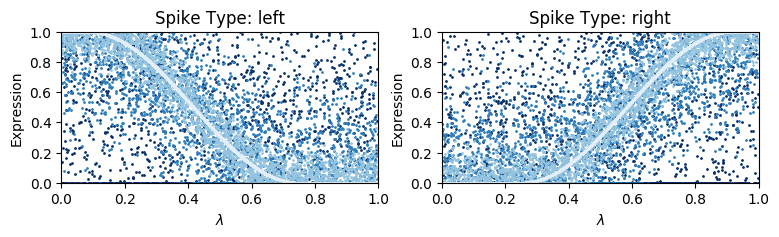

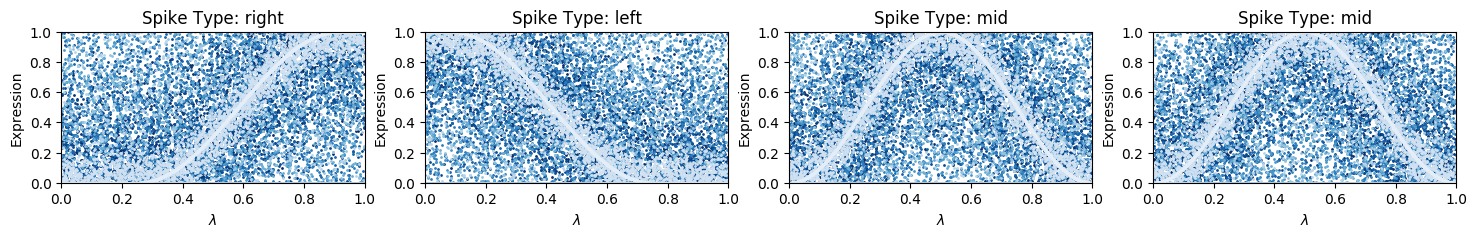

[feat_viz DEBUG] Data (length 16) saved as: /share/PI/sabatti/feat_viz/main_sim_1/param_all.json
[feat_viz DEBUG] Data (shape (40, 3)) saved as: /share/PI/sabatti/feat_viz/main_sim_1/regime_info.csv


(40, 3)

n_samps  sparsity  noise_lev
0     1500     0.001        0.1
1     1500     0.001        0.2
2     1500     0.001        0.5
3     1500     0.001        1.0
4     1500     0.001        1.5

In [17]:
sim_params = get_sim_params("main_sim_1")
plot_spike_grps(sim_params["z_param"]["spike_grp"], 
                sim_params["z_param"]["rel_noise_list"] + [1e-2, 1e-9])
plot_spike_grps(sim_params["x_param"]["spike_grp"], 
                sim_params["noise_levs"] + [1e-2, 1e-9])
logger.setLevel(logging.DEBUG)
# df_regime = gererate_regime_feat_sel(sim_params)
df_regime = generate_regime_info("main_sim_1")
display(df_regime.shape)
df_regime.head()

In [13]:
out_dict = create_sim_feat_sel_trial_jobs(sim_params) # DEPLOYED

[feat_viz DEBUG] Data (shape (40, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_1/regime_info.csv
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_0/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_1/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_2/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_3/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_4/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_5/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_6/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_7/slurm_job.sh
[feat_viz INFO] Created: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_8/slurm_jo

# For testing only

In [7]:
from sim_utils import get_sim_params
sim_params = get_sim_params("main_sim_1")
sim_params["n_trials"] = 3
sim_params["noise_levs"] = [0.1, 2.5]
sim_params["sparsities"] = [0.05]
sim_params["save"] = False
sim_params["methods"] = ["pc", "graph"]
df_regime = gererate_regime_feat_sel(sim_params)
for i_regime, p_regime_null in df_regime.iterrows():
    sub_dir = os.path.join(sim_params["sim_dir"], "regime_results", "regime_{}".format(i_regime))
    launch_regime_feat_sel(sim_params["sim_dir"], sub_dir, i_regime)

[feat_viz INFO] sim. dir. /share/PI/sabatti/feat_viz/main_sim_1
[feat_viz INFO] Results dir: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_0 (Regime: 0)
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.05, 'noise_lev': 0.1, 'i_regime': 0, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_0'}
[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 3, 'noise_levs': [0.1, 2.5], 'sparsities': [0.05], 'target_vars': 8000, 'methods': ['pc', 'graph'], 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_1', 'save': False, 'check_skip': False}
[feat_viz INFO] pc: init corr: 0.8567 
[feat_viz INFO] graph: init corr: 0.8601 
[feat_viz INFO] Current num_var: 400 (0.0500); noise: 0.1
[feat_viz INFO] 

In [24]:
sim_params["noise_levs"] = [2.5, 0.1]
df_regime = gererate_regime_feat_sel(sim_params)
for i_regime, p_regime_null in df_regime.iterrows():
    sub_dir = os.path.join(sim_params["sim_dir"], "regime_results", "regime_{}".format(i_regime))
    launch_regime_feat_sel(sim_params["sim_dir"], sub_dir, i_regime)

[feat_viz DEBUG] Data (length 16) saved as: /share/PI/sabatti/feat_viz/main_sim_1/param_all.json
[feat_viz DEBUG] Data (shape (2, 3)) saved as: /share/PI/sabatti/feat_viz/main_sim_1/regime_info.csv
[feat_viz DEBUG] Data (length 16) loaded from: /share/PI/sabatti/feat_viz/main_sim_1/param_all.json
[feat_viz INFO] Results dir: /share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_0 (Regime: 0)
[feat_viz DEBUG] Data (shape (2, 3)) loaded from: /share/PI/sabatti/feat_viz/main_sim_1/regime_info.csv
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.05, 'noise_lev': 2.5, 'i_regime': 0, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_0'}
[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 3, 'noise_levs': [2.5, 0.1], 'sparsities': [0.05], 'target_vars': 8000, 'met

In [17]:
# checking data reproduciblity (esp. for method comparison)
out_dict = run_feat_sel_sim(sim_params)

[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 3, 'noise_levs': [2.5, 0.1], 'sparsities': [0.05], 'target_vars': 8000, 'method': 'graph', 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_1'}
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.05, 'noise_lev': 2.5, 'i_regime': 0}
[feat_viz INFO] lam, init_lamh corr: 0.8600734628950031 
[feat_viz INFO] Current num_var: 400 (0.0500); noise: 2.5
[feat_viz INFO] Trial 0: used 20.67s
[feat_viz INFO] Remain 41.35s, Avg 20.67s
[feat_viz INFO] Trial 1: used 20.93s
[feat_viz INFO] Remain 20.80s, Avg 20.80s
[feat_viz INFO] Trial 2: used 20.89s
[feat_viz INFO] Remain 0.00s, Avg 20.83s
[feat_viz INFO]   Trial Method      Corr       FDP   Power
0     0  graph  0.920809  0.02877

In [18]:
logger.setLevel(logging.INFO)
out_dict = run_feat_sel_sim(sim_params)

[feat_viz INFO] {'seed': 1, 'n_samps': 1500, 'z_param': {'spike_grp': ['left', 'right'], 'n_repetitions': 1, 'rel_noise_list': [1, 0.1]}, 'x_param': {'spike_grp': ['right', 'left', 'mid', 'mid'], 'n_repetitions': None, 'rel_noise_list': None}, 'n_trials': 3, 'noise_levs': [2.5, 0.1], 'sparsities': [0.05], 'target_vars': 8000, 'method': 'graph', 'graph_k': 10, 'n_perms': 10000, 'alpha': 0.05, 'perm_method': 'pool', 'sim_dir': '/share/PI/sabatti/feat_viz/main_sim_1'}
[feat_viz INFO] {'n_samps': 1500.0, 'sparsity': 0.05, 'noise_lev': 2.5, 'i_regime': 0, 'sub_dir': '/share/PI/sabatti/feat_viz/main_sim_1/regime_results/regime_0'}
[feat_viz INFO] lam, init_lamh corr: 0.8600734628950031 
[feat_viz INFO] Current num_var: 400 (0.0500); noise: 2.5
[feat_viz INFO] Trial 0: used 20.82s
[feat_viz INFO] Remain 41.63s, Avg 20.82s
[feat_viz INFO] Trial 1: used 20.96s
[feat_viz INFO] Remain 20.89s, Avg 20.89s
[feat_viz INFO] Trial 2: used 20.90s
[feat_viz INFO] Remain 0.00s, Avg 20.89s
[feat_viz INFO] 